
# TMDB Movie Dataset Exploration
### by Alicia Bosch

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This notebook will explore a data set that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

The final goal of this analysis is to understand what makes a film more profitable. I will try to understand different features around its profitability and will finally fulfil this goal. I will mainly answer the following questions related to the profit:

- What are the top 20 most profitable movies? and the less profitable ones?
- What are the top 20 actors who always work in highly profitable films?
- What genres are most popular from year to year? Is it related to a higher profit?




*The final two columns in this data set, ending with “_adj”, show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.patches as mpatches
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#deleting all those variables that will not help in answering my main questions
df.drop(['id','imdb_id','homepage', 'tagline','overview', 'production_companies', 'keywords', 'vote_count'], axis=1, inplace=True)

In [7]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


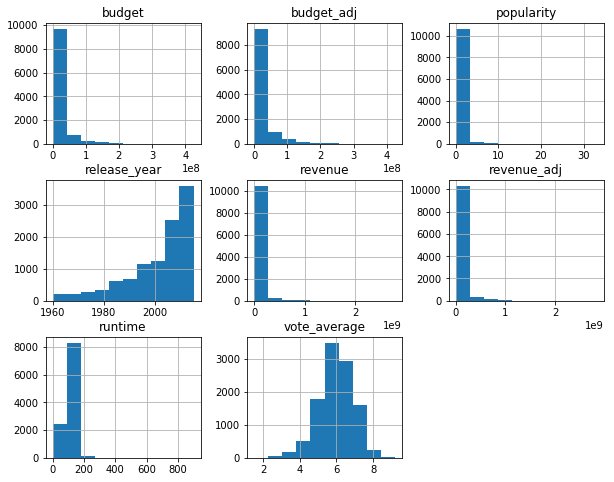

In [8]:
df.hist(figsize=(10,8));

In [9]:
#counting null values
df.budget.isnull().any().sum()

0

In [10]:
#deleting null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.1+ MB


In [11]:
df.sample(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
7993,1.115139,40600000,90400000,Trading Places,Eddie Murphy|Dan Aykroyd|Jamie Lee Curtis|Denh...,John Landis,116,Comedy|Drama,6/7/83,6.9,1983,8.888607e+07,1.979138e+08
6240,1.102836,58000000,102854431,Just Like Heaven,Reese Witherspoon|Mark Ruffalo|Donal Logue|Din...,Mark Waters,95,Comedy|Fantasy|Romance,9/16/05,6.5,2005,6.476067e+07,1.148435e+08
7822,0.010471,200000,0,The Union: The Business Behind Getting High,George H. W. Bush|George W. Bush|Chris Bennett,Brett Harvey,104,Comedy|Documentary,5/8/07,6.8,2007,2.103337e+05,0.000000e+00
8373,0.071358,0,0,Mom and Dad Save the World,Teri Garr|Jeffrey Jones|Jon Lovitz|Thalmus Ras...,Greg Beeman,88,Adventure|Comedy|Family|Science Fiction,7/24/92,4.8,1992,0.000000e+00,0.000000e+00
5076,0.438475,5000000,742898,Party Monster,Seth Green|Macaulay Culkin|ChloÃ« Sevigny|Dian...,Fenton Bailey|Randy Barbato,98,Comedy|Drama|Crime,9/5/03,5.6,2003,5.926763e+06,8.805961e+05


In [12]:
df.shape

(10732, 13)

### Structure of the dataset
Originally, there were 21 features but I reduced to 13, including only those that are of interest to answering the main questions. We'll have information of 10732 movies. 

Also, This data set in particulat was 'pretty clean' and didn't need too much wrangling. Apart from deleting the non-crucial variables I also erased the nun-values. Having such a large sample, we could allow ourselves to do it.

### Main features of interest
I'm mostly interested in understading features related to making a film more profitable. Thus, I have included some features such as cast, film title, runtime, genre and release year.

I personally suspect that the genre, cast and release year will have a strong influence in the film's profitability.

<a id='eda'></a>
## Exploratory Data Analysis

### 1. What are the top 20 most profitable movies? and the less profitable ones?

In [13]:
#calculate profit
profit = df['revenue_adj'] - df['budget_adj']
df.insert(2,'profit', profit)
df.head(1)

,popularity,budget,profit,revenue,original_title,cast,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1.254446e+09,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09


In [14]:
df['profit'].describe()

count    1.073200e+04
mean     3.423503e+07
std      1.259368e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.383260e+07
max      2.750137e+09
Name: profit, dtype: float64

In [15]:
film_count = df['original_title'].value_counts()
films = film_count.index
films

Index(['Hamlet', 'Frankenstein', 'The Black Hole', 'A Christmas Carol', 'Emma',
       'Annie', 'Life', 'Carrie', 'Wuthering Heights', 'Hercules',
       ...
       'Hallam Foe', 'Pompeii', 'Virtuosity', 'Stuck on You', 'Amreeka',
       'Backdraft', 'La luna', 'Out to Sea',
       'Red Riding: In the Year of Our Lord 1974',
       'Police Academy 5: Assignment Miami Beach'],
      dtype='object', length=10439)

In [16]:
film_profit = df.groupby('original_title')['profit'].mean().sort_values(ascending=False)
most_profit = film_profit[:20]
print('The most profitable films are:',most_profit)
print('-'*20)
less_profit = film_profit[len(film_profit)-20:]
print('The less profitable films are:',less_profit)

The most profitable films are: original_title
Star Wars                                        2.750137e+09
Avatar                                           2.586237e+09
The Exorcist                                     2.128036e+09
Jaws                                             1.878643e+09
E.T. the Extra-Terrestrial                       1.767968e+09
Star Wars: The Force Awakens                     1.718723e+09
The Net                                          1.551568e+09
One Hundred and One Dalmatians                   1.545635e+09
The Empire Strikes Back                          1.376998e+09
Jurassic Park                                    1.293767e+09
Jurassic World                                   1.254446e+09
The Godfather                                    1.246626e+09
The Lord of the Rings: The Return of the King    1.214855e+09
Furious 7                                        1.210949e+09
Return of the Jedi                               1.182995e+09
Harry Potter and the Dea

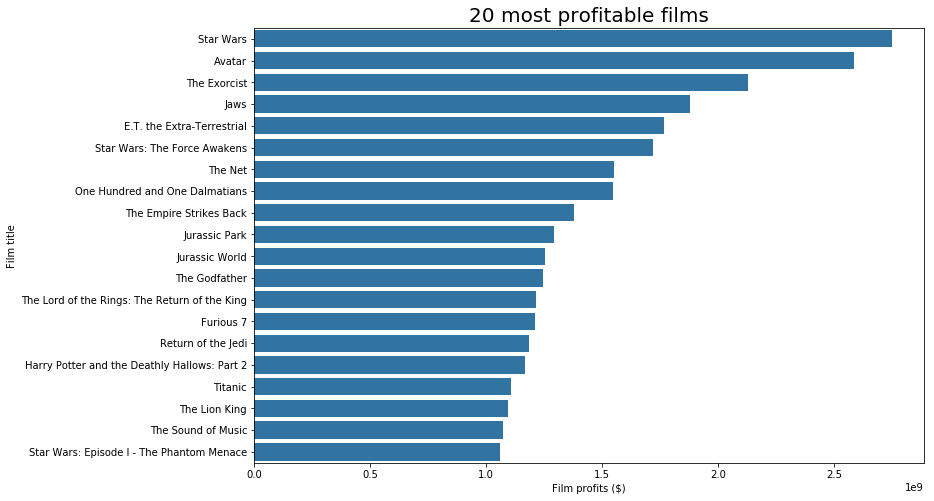

In [17]:
plt.figure(figsize = [12,8])
base_color = sb.color_palette()[0]
in_order = most_profit.index
sb.barplot(most_profit.values, in_order, color = base_color)
plt.xlabel('Film profits ($)');
plt.ylabel('Film title');
plt.title('20 most profitable films', size=20);

This plot depicts how Star Wars and Avatar are the clear winner, with $2.75 B in profits. That's an insane quantity. 
The top 5 films in profits are:

- Star Wars
- Avatar
- The Exorcist
- Jaws
- E.T

The curve descends down to $1 B with 'Star Wars: Expisode I: The Phantom Menace', the number 20. 
The Star Wars saga is strikingly impressive: it has 5 films of its saga in this top20 list. Let's quickly add them up and see how much this saga has won in profits.

#### Total amount gained in profts by the top 5 most profitable films in Star Wars

In [18]:
#create list of top profitable films in the Star Wars saga
starwars = ['Star Wars','Star Wars: The Force Awakens','The Empire Strikes Back','Return of the Jedi', 'Star Wars: Episode I - The Phantom Menace']

In [19]:
#creating a dataframe with only those films
df_starwars = df.loc[df['original_title'].isin(starwars)]
df_starwars['original_title'].value_counts()

The Empire Strikes Back                      1
Return of the Jedi                           1
Star Wars: The Force Awakens                 1
Star Wars                                    1
Star Wars: Episode I - The Phantom Menace    1
Name: original_title, dtype: int64

In [20]:
#creating a variable with the films and its associated profit
starwars_count = df_starwars.groupby(['original_title']).profit.mean()
starwars_count

original_title
Return of the Jedi                           1.182995e+09
Star Wars                                    2.750137e+09
Star Wars: Episode I - The Phantom Menace    1.059439e+09
Star Wars: The Force Awakens                 1.718723e+09
The Empire Strikes Back                      1.376998e+09
Name: profit, dtype: float64

In [21]:
#adding up the profits
starwars_count.values.sum().round()

8088291579.0

*Star Wars (only top 5 films, not ALL the saga) made in PROFITS the crazy amount of 8B!!*

After this finding, let's explore the less profitable films

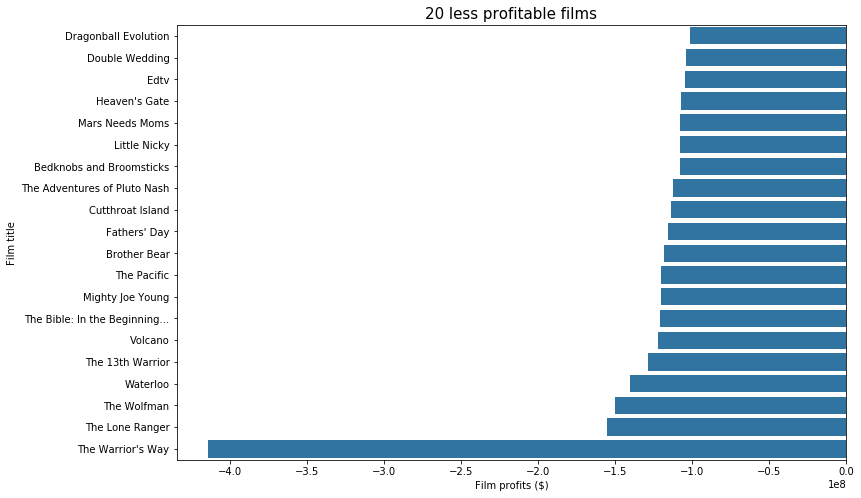

In [22]:
plt.figure(figsize = [12,8])
base_color = sb.color_palette()[0]
in_order = less_profit.index
sb.barplot(less_profit.values, in_order, color = base_color)
plt.xlabel('Film profits ($)');
plt.ylabel('Film title');
plt.title('20 less profitable films', size=15);

The Warrior's Way clearly didn't get lots of views. It lost 400M. It's the big loser by an outstanding gap. After this, The Lone Ranger and The Wolfman follow this list with 150M, more or less.

### 2. What are the 10 actors who work in the most profitable films?

As a reminder, the final two columns in this data set, ending with “_adj”, show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [23]:
#converting the column into a list of actors by splittung at the pipe symbol
df['cast'] = df['cast'].str.split("|", n = 10, expand = True)

In [24]:
#focus on actors who have been involved in more than 10 films
actor_count = df['cast'].value_counts()
actor10 = (actor_count[actor_count>10])
actor10

Nicolas Cage             50
Robert De Niro           42
Bruce Willis             39
Clint Eastwood           38
Johnny Depp              37
Tom Hanks                37
Sylvester Stallone       36
Steven Seagal            35
Jean-Claude Van Damme    35
John Travolta            33
Denzel Washington        33
Robin Williams           33
Tom Cruise               31
John Cusack              30
Steve Martin             30
Harrison Ford            30
Keanu Reeves             29
Samuel L. Jackson        29
Sean Connery             29
Al Pacino                29
Arnold Schwarzenegger    29
Woody Allen              29
Adam Sandler             29
Eddie Murphy             29
Mel Gibson               28
Kevin Costner            28
Ben Stiller              26
Michael Douglas          26
Jeff Bridges             25
Kurt Russell             25
                         ..
Patrick Swayze           12
Forest Whitaker          12
Colin Firth              12
Kevin Kline              12
Cate Blanchett      

In [25]:
#pick only actors that are in the the above list
df_actor = df.loc[df['cast'].isin(actor10.index)]

In [26]:
#top actors related to profitable movies
ave_prof = df_actor.groupby('cast')['profit'].mean()
actors_profits = ave_prof.sort_values(ascending=False)
actors_profits

cast
Daniel Radcliffe         5.054450e+08
Robert Downey Jr.        2.958580e+08
Will Smith               2.631802e+08
Tom Cruise               2.379647e+08
Kristen Stewart          2.214913e+08
Mike Myers               2.201101e+08
Harrison Ford            2.200316e+08
Kate Winslet             2.112377e+08
Tom Hanks                2.085850e+08
Sandra Bullock           1.819723e+08
Daniel Craig             1.778381e+08
Sean Connery             1.767703e+08
Vin Diesel               1.640100e+08
Elijah Wood              1.549779e+08
Ben Stiller              1.539267e+08
Julia Roberts            1.485209e+08
Jim Carrey               1.452231e+08
Bradley Cooper           1.449958e+08
Steve Carell             1.430169e+08
Leonardo DiCaprio        1.406544e+08
Christian Bale           1.382714e+08
Arnold Schwarzenegger    1.303629e+08
Brad Pitt                1.269355e+08
Michael J. Fox           1.263025e+08
Burt Reynolds            1.254138e+08
Sylvester Stallone       1.244459e+08
Hugh Ja

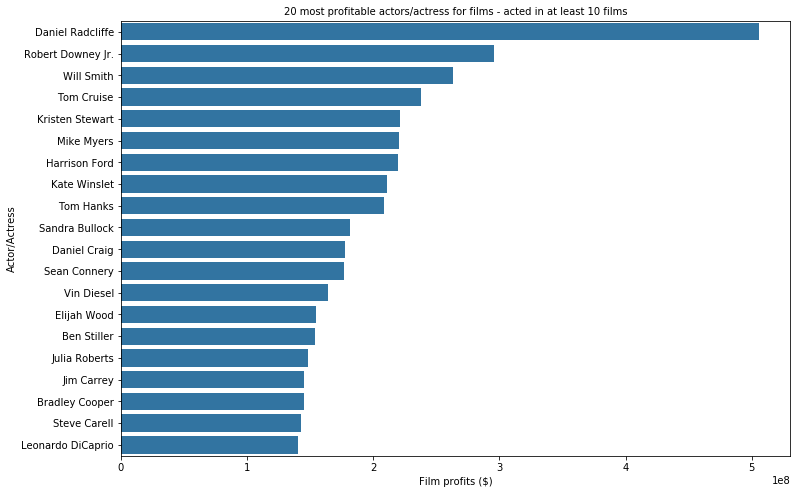

In [27]:
#plot the actors related to most profitable movies
plt.figure(figsize = [12,8])
base_color = sb.color_palette()[0]
in_order = actors_profits.index[:20]
sb.barplot(actors_profits.values[:20], in_order, color = base_color)
plt.xlabel('Film profits ($)');
plt.ylabel('Actor/Actress');
plt.title('20 most profitable actors/actress for films - acted in at least 10 films', size=10);

Out of the actors/actresses who have at least casted in 10 films, Daniel Radcliffe was the one actor that acted in really profitable films by a huge difference. Harry Potter's films paid off. He almost doubles the second in the list. He overpasses the 500M$ whereas the second in the list is around $27M.

Top 5 in this list are:

- Daniel Radcliffe
- Robert Downey Jr.
- Will Smith
- Tom Cruise
- Kristen Stewart

Kristen Stewart, Mike Myers and Harrison Ford get very similar results, around 220M. 

Surprisingly there are only 4 woman out of the top20 list: Kristen Stewart, Kate Winslet, Sandra Bullock and Julia Roberts.
Also, it can be seen how the plot decreases sharply, from the second to the last one, Leornardo Di Caprio.

### Which genres are most popular from year to year?

In [28]:
df['genres'] = df['genres'].str.split("|", n = 10, expand = True)

In [29]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.genres.describe()

count     10732
unique       20
top       Drama
freq       2443
Name: genres, dtype: object

In [30]:
#we create a dataframe that only includes popular films
df_a = df.query('vote_average > 7')
df_a.shape

(1229, 14)

In [31]:
top_genres = df_a['genres'].value_counts()
top_genres

Drama              356
Documentary        179
Comedy             171
Action             119
Adventure           71
Animation           71
Crime               63
Science Fiction     33
Music               26
Horror              26
Thriller            24
Fantasy             22
Romance             22
Family              12
War                  9
Western              7
History              7
Mystery              6
TV Movie             5
Name: genres, dtype: int64

Just above it shows how Drama, Documentary, Comedy and Action are the most popular genres. We should check that they have increased over the years, we need to see how this number is distributed over the years.

We are just going to study the top 4 and see how they evolve throughout the years.

In [32]:
#create a list with top 4 genres
top4_genres = top_genres.index[:4]
top4_genres

Index(['Drama', 'Documentary', 'Comedy', 'Action'], dtype='object')

In [33]:
#create dataframe with only the info on the top4 4 genres
df_genres = df_a.loc[df_a['genres'].isin(['Drama', 'Documentary', 'Comedy', 'Action'])]
df_genres.shape

(825, 14)

In [34]:
df_genres.genres.value_counts()

Drama          356
Documentary    179
Comedy         171
Action         119
Name: genres, dtype: int64

In [35]:
table = df_genres.groupby('release_year').genres.value_counts()
table

release_year  genres     
1960          Comedy          2
              Drama           2
1961          Comedy          3
              Drama           1
1962          Action          1
1963          Comedy          1
              Drama           1
1964          Comedy          2
              Drama           2
1965          Drama           3
1966          Comedy          1
              Documentary     1
              Drama           1
1967          Comedy          2
              Action          1
              Drama           1
1968          Comedy          2
1969          Drama           1
1970          Action          3
              Documentary     1
1971          Action          2
              Drama           2
              Comedy          1
1972          Comedy          3
              Action          2
              Drama           1
1973          Drama           5
              Comedy          2
              Action          1
1974          Comedy          3
              

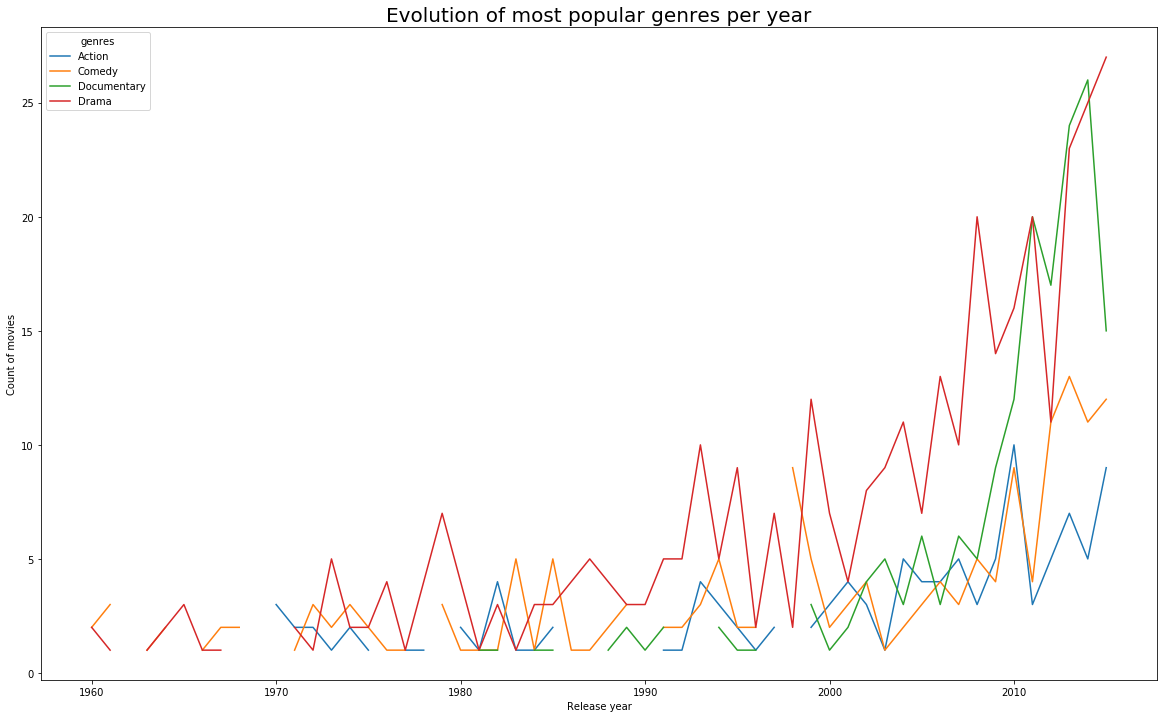

In [36]:
fig, ax = plt.subplots(figsize=(20,12))
table.unstack().plot(ax=ax)
plt.xlabel('Release year');
plt.ylabel('Count of movies');
plt.title('Evolution of most popular genres per year', size = 20);

Looking into the total number of films throughout the years, it seems that drama and documentary are the winners in ABSOLUTE terms. Funnily, in 2015 Documentaries seem to get a bid drop in its releases.
The reference used to find the unstack function was: https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

Let's now look at the relative terms and calculate the proportions

In [37]:
#getting the proportion of filmd per genre
table_total = df_genres.groupby('release_year').genres.value_counts()
total_proportion = table_total.groupby(level=0).apply(lambda x: (round(x/float(x.sum())*100)))

In order to get the proportions out of a value_counts the reference I lookied for this is: https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby

In [38]:
total_proportion[:10]

release_year  genres
1960          Comedy     50.0
              Drama      50.0
1961          Comedy     75.0
              Drama      25.0
1962          Action    100.0
1963          Comedy     50.0
              Drama      50.0
1964          Comedy     50.0
              Drama      50.0
1965          Drama     100.0
Name: genres, dtype: float64

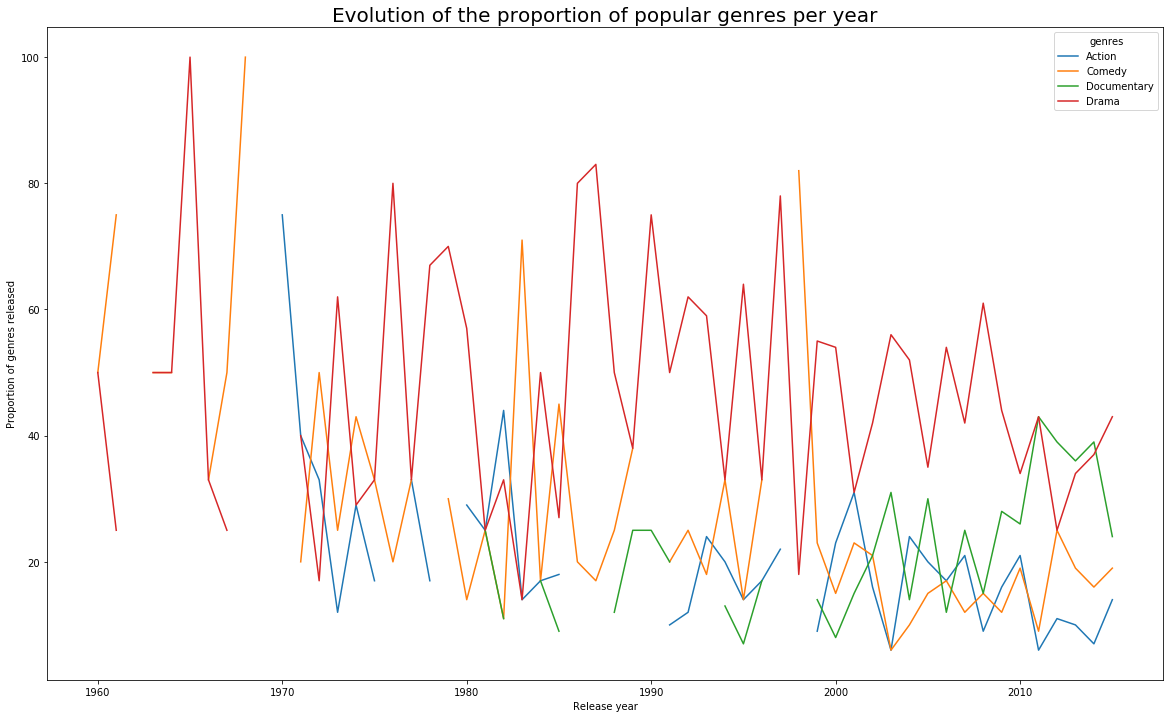

In [54]:
fig, ax = plt.subplots(figsize=(20,12))
total_proportion.unstack().plot(ax=ax)
plt.xlabel('Release year');
plt.ylabel('Proportion of genres released');
plt.title('Evolution of the proportion of popular genres per year', size = 20);

However, in relative terms, the tendency changes from the absolute ones. Drama and Comedy were highly popular until just before the 2000s. From the new century onwards, Drama continues on this popularity trend but the Comedy genre suddenly plummets, letting the Documentary genre come strongly into play and increase its popularity tendency. 

###  What more features are associated to profit?

We'll focus on studying the features genres, runtime and release year.

In [49]:
genres_profit = df.groupby('genres')['profit'].mean().sort_values(ascending=False)
genres_profit

genres
Adventure          1.184397e+08
Science Fiction    7.051561e+07
Animation          5.777580e+07
Family             5.747508e+07
Fantasy            5.574866e+07
Action             4.461986e+07
History            4.218105e+07
Romance            3.453377e+07
Crime              3.031328e+07
Comedy             2.598026e+07
Music              2.515699e+07
War                2.357909e+07
Drama              2.286285e+07
Western            2.103681e+07
Mystery            1.759466e+07
Thriller           1.729782e+07
Horror             1.712146e+07
Documentary        1.845521e+06
TV Movie           4.722073e+05
Foreign            0.000000e+00
Name: profit, dtype: float64

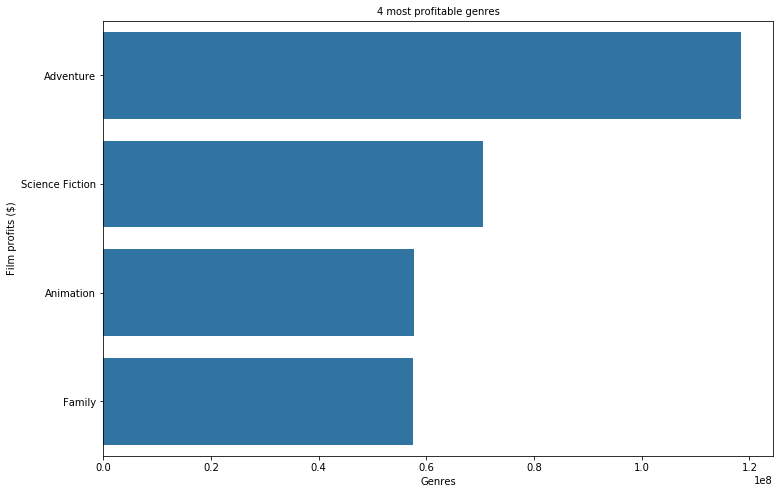

In [50]:
#bar chart of profits and genres
plt.figure(figsize = [12,8])
base_color = sb.color_palette()[0]
in_order = genres_profit.index[:4]
sb.barplot(genres_profit.values[:4], in_order, color = base_color)
plt.xlabel('Genres');
plt.ylabel('Film profits ($)');
plt.title('4 most profitable genres', size=10);

Most profitable genres are Adventure and Science Fiction. Animation and Family come after them with very similar profits.

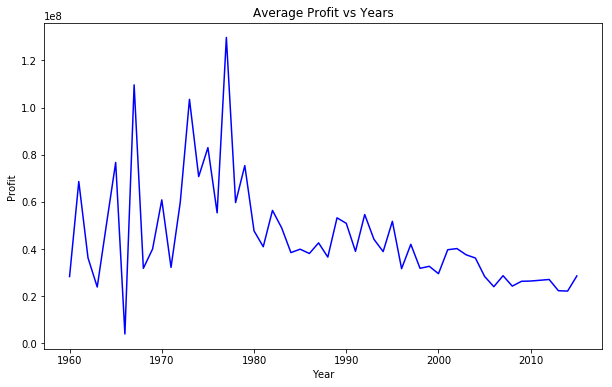

In [51]:
#call the groupby_avg function and passing release_year and profit arguments
avg_profit_year = df.groupby("release_year")['profit'].mean()
# plot relationship between release_year and profit
avg_profit_year.plot(kind='line',color='blue',title='Average Profit vs Years',figsize = (10,6))
plt.xlabel('Year');
plt.ylabel('Profit');

Taking into consideration inflation, profits actually decrease throughout the years. 1978 was a great year to release movies. 1967 was the worst.

Text(0,0.5,'Average Profit')

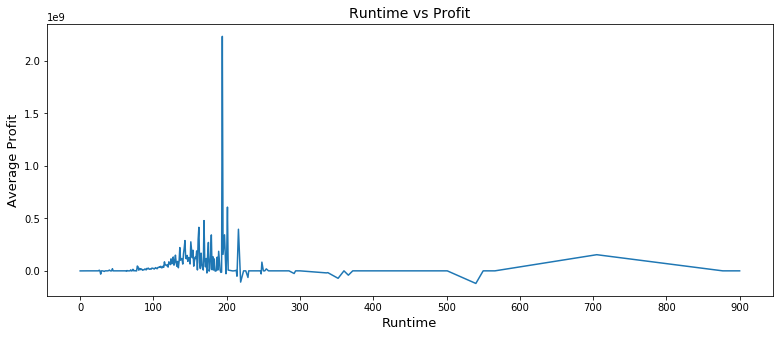

In [53]:
plt.figure(figsize = [12,8])
df.groupby('runtime')['profit'].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))
#setup the title of the figure
plt.title("Runtime vs Profit",fontsize = 14)
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)

Around 200 min is the most appropiate runtime to gain more profits.

<a id='conclusions'></a>
## Conclusions

#### What are the top 20 most profitable movies? and the less profitable ones?

This plot depicts how Star Wars and Avatar are the clear winner, with 2.75B in profits. That's an insane quantity. 
The top 5 films in profits are:

- Star Wars
- Avatar
- The Exorcist
- Jaws
- E.T

The curve descends down to 1B with 'Star Wars: Expisode I: The Phantom Menace', the number 20. 
The Star Wars saga is strikingly impressive: it has 5 films of its saga in this top20 list. Let's quickly add them up and see how much this saga has won in profits.

Star Wars (only its top 5 films, not ALL the saga) made in PROFITS the crazy amount of 8B!!

From the top less profitable films:
The Warrior's Way clearly didn't get lots of views. It lost 400M. It's the big loser by an outstanding gap. After this, The Lone Ranger and The Wolfman follow this list with a 150M loss, more or less.

#### What are the top 20 actors who always work in highly profitable films?

Out of the actors/actresses who have at least casted in 10 films, Daniel Radcliffe was the one actor that acted in really profitable films by a huge difference. Harry Potter's films paid off. He almost doubles the second in the list. He overpasses the 500M$ whereas the second in the list is around $27M.

Top 5 in this list are:

- Daniel Radcliffe
- Robert Downey Jr.
- Will Smith
- Tom Cruise
- Kristen Stewart

Kristen Stewart, Mike Myers and Harrison Ford get very similar results, around 220M. 

Surprisingly there are only 4 woman out of the top20 list: Kristen Stewart, Kate Winslet, Sandra Bullock and Julia Roberts.
Also, it can be seen how the plot decreases sharply, from the second to the last one, Leornardo Di Caprio.

#### What genres are most popular from year to year? 
Looking into the total number of films throughout the years, it seems that drama and documentary are the winners in ABSOLUTE terms. Funnily, in 2015 Documentaries seem to get a bid drop in its releases (from 26 to 15)

However, in relative terms, the tendency changes from the absolute ones. Drama and Comedy were highly popular until just before the 2000s. From the new century onwards, Drama continues on this popularity trend but the Comedy genre suddenly plummets, letting the Documentary genre come strongly into play and increase its popularity tendency. 

####  What more features are associated to profit?

Most profitable genres are Adventure (120M) and Science Fiction (70M). Animation and Family come after them with very similar profits.

Taking into consideration inflation, profits actually decrease throughout the years. 1978 was a great year to release movies. 1967 was the worst.

Around 200 min is the most appropriate runtime to gain more profits.


### REFERENCES

The reference used to find the unstack function was: 

https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

In order to get the proportions out of a value_counts the reference I lookied for this is: 

https://stackoverflow.com/questions/23377108/pandas-percentage-of-total-with-groupby


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255